# Бернуллийн Наив Байесын загварын хэрэглээ: Хэрэглэгчийн худалдан авах төлөвийг урьдчилан таамаглах нь

**Төслийн ажил - Машин сургалт**

**Багийн гишүүд:**
- Б.Билгүүнтөгөлдөр (20B1NUM1087)
- О.Эрдэнэбаяр (21B1NUM0940)
- Э.Алтаншагай (22B1NUM0331)
- Б.Намуундарь (23B1NUM0543)
- Ч.Саранцацралт (24B1NUM0019)

---

## Хураангуй (Abstract)

Энэхүү төслийн ажлаар Kaggle платформоос авсан Groceries өгөгдлийн санг ашиглан хэрэглэгчдийн худалдан авалтын төлөвийг урьдчилан таамаглах Бернуллийн Наив Байес (Bernoulli Naive Bayes) ангилалын загварыг математик үндэслэлтэйгээр эхнээс нь бүтээв. Тус загвар нь Байесын теоремд суурилсан магадлалын аргачлал бөгөөд хоёртын (binary) шинж чанаруудтай өгөгдөлд тохиромжтой. Судалгаанд 9,835 гүйлгээ, 169 өвөрмөц бүтээгдэхүүн агуулсан өгөгдлийг боловсруулж, "whole milk" (бүтэн сүү) худалдан авах эсэхийг таамаглах загвар бүтээв. Загварыг 5-fold кросс-валидациар үнэлэхэд дундаж нарийвчлал 73-76% байв. Энэхүү төсөл нь Байесын статистик үнэлгээ, Лапласын тэгшитгэл (smoothing), лог магадлалын тооцоолол зэрэг математик үндэслэлийг дэлгэрэнгүй тайлбарлаж, sklearn номын сангийн BernoulliNB загвартай харьцуулсан болно.

**Түлхүүр үгс:** Бернуллийн Наив Байес, машин сургалт, ангилал, худалдан авалтын таамаглал, Байесын теорем, нөхцөлт үл хамаарал

## 1. Оршил

### 1.1 Судалгааны хэрэгцээ, шаардлага

Орчин үеийн жижиглэн худалдааны салбарт хэрэглэгчдийн худалдан авах зан төлөвийг урьдчилан таамаглах нь маркетингийн стратеги, бараа материалын менежмент, хувийн санал болгох систем зэрэгт чухал ач холбогдолтой (Leskovec et al., 2014). Машин сургалтын аргуудыг ашиглан хэрэглэгчдийн өмнөх худалдан авалтын түүх дээр үндэслэн ирээдүйн худалдан авалтыг таамаглах боломжтой.

Байесын зарчимд суурилсан ангиллын алгоритмууд нь статистикийн хүчтэй үндэслэлтэй, тайлбарлагдах боломжтой, бага өгөгдөлтэй ч сайн ажилладаг зэрэг давуу талтай (Махгал, 2025). Бернуллийн Наив Байес нь ялангуяа хоёртын (binary) шинж чанаруудтай өгөгдөлд тохиромжтой бөгөөд текст ангилал, худалдан авалтын дүн шинжилгээнд өргөн хэрэглэгддэг.

### 1.2 Зорилго

Энэхүү төслийн зорилго нь:
1. Бернуллийн Наив Байесын алгоритмыг математик үндэслэлтэйгээр ойлгох, батлах
2. Тус алгоритмыг Python хэлээр эхнээс нь бүтээх (sklearn ашиглахгүй)
3. Groceries өгөгдлийн сан дээр загварыг сургаж, үнэлгээ хийх
4. Хэрэглэгчийн худалдан авах магадлалыг нөхцөлт магадлалын аргаар тооцоолох
5. Sklearn номын сангийн загвартай харьцуулж, баталгаажуулах

### 1.3 Өгөгдлийн эх сурвалж

Судалгаанд Kaggle платформ дээрх "Groceries" өгөгдлийн санг ашиглав (Hahsler et al., 2006). Тус өгөгдөл нь хүнсний дэлгүүрийн 9,835 гүйлгээг агуулсан бөгөөд гүйлгээ бүрт худалдан авсан бүтээгдэхүүнүүдийн жагсаалт байна. Өгөгдлийг https://www.kaggle.com/datasets/irfanasrullah/groceries хаягаас татаж авав.

## 2. Онолын үндэслэл

### 2.1 Байесын теорем

**Тодорхойлолт 2.1 (Нөхцөлт магадлал):** $A$ ба $B$ үзэгдлүүдийн хувьд $B$ өгөгдсөн үеийн $A$-ийн нөхцөлт магадлалыг дараах байдлаар тодорхойлно (Murphy, 2012):

$$P(A|B) = \frac{P(A \cap B)}{P(B)}, \quad P(B) > 0$$

**Теорем 2.1 (Байесын теорем):** $A$ ба $B$ үзэгдлүүдийн хувьд дараах тэнцэтгэл биелнэ:

$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

**Баталгаа:** Нөхцөлт магадлалын тодорхойлолтоос:
$$P(A|B) = \frac{P(A \cap B)}{P(B)} \quad \text{ба} \quad P(B|A) = \frac{P(A \cap B)}{P(A)}$$

Хоёр дахь тэнцэтгэлээс $P(A \cap B) = P(B|A) \cdot P(A)$ гэж бичвэл:
$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} \quad \blacksquare$$

**Тайлбар:** Байесын теоремийн бүрэлдэхүүн хэсгүүд:
- $P(A|B)$ — **Арын магадлал** (posterior probability): $B$ нотолгоо өгөгдсөн үед $A$-ийн магадлал
- $P(B|A)$ — **Үнэний хувь** (likelihood): $A$ таамаглал үнэн үед $B$ нотолгоо ажиглагдах магадлал
- $P(A)$ — **Өмнөх магадлал** (prior probability): Нотолгооноос өмнөх $A$-ийн магадлал
- $P(B)$ — **Нотолгооны магадлал** (evidence): Нормчлолын тогтмол

### 2.2 Наив Байесын нөхцөлт үл хамааралын таамаглал

**Асуудал:** $P(\mathbf{X}|C) = P(X_1, X_2, ..., X_n|C)$ хамтын нөхцөлт тархалтыг шууд үнэлэх бэрхшээлтэй. Хэрэв $X_i \in \{0,1\}$ бол $2^n$ параметр үнэлэх шаардлагатай.

**Тодорхойлолт 2.2 (Нөхцөлт үл хамаарал):** $X_1, ..., X_n$ санамсаргүй хувьсагчид $C$ өгөгдсөн үед нөхцөлт хамааралгүй гэж нэрлэгдэнэ, хэрэв:

$$P(X_1, ..., X_n | C) = \prod_{i=1}^{n} P(X_i | C)$$

**Тэмдэглэгээ:** $X_i \perp X_j | C, \quad \forall i \neq j$

**Математик утга (Махгал, 2025):** Энэ таамаглал нь $n$ шинж чанарын хамтын тархалтыг $n$ ширхэг нэг хэмжээст тархалт руу задлах боломжийг олгодог. Үүнээр үнэлэх параметрүүдийн тоог $O(2^n)$-ээс $O(n)$ болгон бууруулдаг.

**Лемм 2.1:** Наив таамаглал ёсоор магадлалын гинжин дүрэм хялбарчлагдана:

$$P(X_1, ..., X_n | C) = P(X_1|C) \cdot P(X_2|X_1, C) \cdot ... \cdot P(X_n|X_1,...,X_{n-1}, C)$$

Наив таамаглал: $P(X_i | X_j, C) = P(X_i | C)$ тул:

$$P(X_1, ..., X_n | C) = \prod_{i=1}^{n} P(X_i | C) \quad \blacksquare$$

### 2.3 Бернуллийн Наив Байес загвар

**Тодорхойлолт 2.3 (Бернуллийн тархалт):** $X \in \{0, 1\}$ санамсаргүй хувьсагч нь $\theta$ параметртай Бернуллийн тархалттай гэж нэрлэгдэнэ, хэрэв:

$$P(X = x) = \theta^x (1-\theta)^{1-x}, \quad x \in \{0, 1\}$$

Үүнд $\theta = P(X=1)$ нь амжилтын магадлал.

**Шалгалт:**
- $x=1$ үед: $P(X=1) = \theta^1 (1-\theta)^0 = \theta$ ✓
- $x=0$ үед: $P(X=0) = \theta^0 (1-\theta)^1 = 1-\theta$ ✓
- Нийлбэр: $\theta + (1-\theta) = 1$ ✓

**Теорем 2.2 (Бернуллийн Наив Байес ангилагч):** $\mathbf{X} = (X_1, ..., X_n) \in \{0,1\}^n$ хоёртын шинж чанарууд, $C \in \{0, 1\}$ хоёртын анги өгөгдсөн үед Бернуллийн Наив Байес ангилагчийн таамаглал:

$$\hat{C} = \arg\max_{c \in \{0,1\}} \left[ P(C=c) \prod_{i=1}^{n} P(X_i=1|C=c)^{X_i} \cdot (1-P(X_i=1|C=c))^{1-X_i} \right]$$

**Баталгаа:** Байесын теорем + Наив таамаглал + Бернуллийн тархалт:

$$P(C|\mathbf{X}) \propto P(C) \prod_{i=1}^{n} P(X_i|C)$$

$X_i | C \sim \text{Bernoulli}(\theta_{ic})$ үед:

$$P(X_i|C) = \theta_{ic}^{X_i} (1-\theta_{ic})^{1-X_i}$$

Орлуулбал:

$$P(C|\mathbf{X}) \propto P(C) \prod_{i=1}^{n} \theta_{ic}^{X_i} (1-\theta_{ic})^{1-X_i} \quad \blacksquare$$

### 2.4 Лапласын тэгшитгэл (Laplace Smoothing)

**Асуудал:** Maximum Likelihood үнэлгээ (MLE):

$$\hat{\theta}_{ic}^{MLE} = \frac{N_{ic}}{N_c}$$

Үүнд $N_{ic}$ нь $C=c$ ангид $X_i=1$ байсан тоо, $N_c$ нь $C=c$ ангийн нийт тоо.

Хэрэв $N_{ic} = 0$ бол $\hat{\theta}_{ic} = 0$ болж, бүтээгдэхүүний магадлал тэг болно. Энэ нь бусад бүх шинж чанаруудын мэдээллийг устгана (тэг үржүүлбэл тэг).

**Шийдэл (Байесын үнэлгээ):** Beta prior тархалт ашиглана:

$$\theta_{ic} \sim \text{Beta}(\alpha, \alpha)$$

Posterior дундаж (MAP үнэлгээ):

$$\hat{\theta}_{ic}^{MAP} = \frac{N_{ic} + \alpha}{N_c + 2\alpha}$$

**Тайлбар:**
- $\alpha$ — smoothing параметр (pseudo-count)
- Тоологч: $N_{ic} + \alpha$ (бодит + хуурамч $X_i=1$ ажиглалт)
- Хуваагч: $N_c + 2\alpha$ (нийт + хуурамч $X_i=1$ + хуурамч $X_i=0$)

**Яагаад $2\alpha$?** Хоёртын хувьсагч 2 утгатай ($k=2$), тул $k\alpha = 2\alpha$.

### 2.5 Лог магадлалын хувиргалт

**Асуудал (Numerical underflow):** $n$ шинж чанартай үед магадлалуудын үржвэр маш бага утга авч, компьютерт 0 болж хувирна.

**Шийдэл:** Лог хувиргалт. $\log$ функц нь strictly monotone increasing тул:

$$\arg\max_c f(c) = \arg\max_c \log f(c)$$

**Теорем 2.3 (Лог магадлалын томъёо):**

$$\log P(C|\mathbf{X}) \propto \log P(C) + \sum_{i=1}^{n} \left[ X_i \log \theta_{ic} + (1-X_i) \log(1-\theta_{ic}) \right]$$

## 3. Өгөгдлийн боловсруулалт

### 3.1 Шаардлагатай сангуудыг ачаалах

In [30]:
# ============================================
# Шаардлагатай сангуудыг ачаалах
# Importing required libraries
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# График тохиргоо
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-v0_8-whitegrid')

# Санамсаргүй байдлын seed тогтоох (reproducibility)
np.random.seed(42)

print("Сангуудыг амжилттай ачааллаа!")
print(f"NumPy хувилбар: {np.__version__}")
print(f"Pandas хувилбар: {pd.__version__}")

Сангуудыг амжилттай ачааллаа!
NumPy хувилбар: 1.26.4
Pandas хувилбар: 2.1.4


### 3.2 Өгөгдлийг ачаалах ба судлах

In [31]:
# ============================================
# Өгөгдлийг ачаалах
# Loading the Groceries dataset
# ============================================

# Өгөгдлийг унших (мөр бүр нь нэг гүйлгээ, таслалаар тусгаарлагдсан бүтээгдэхүүнүүд)
transactions = []
with open('groceries.csv', 'r', encoding='utf-8') as f:
    for line in f:
        # Мөр бүрийг таслалаар задлаж, хоосон утгуудыг арилгах
        items = [item.strip() for item in line.strip().split(',') if item.strip()]
        if items:  # Хоосон мөрүүдийг алгасах
            transactions.append(items)

print(f"Нийт гүйлгээний тоо: {len(transactions):,}")
print(f"\nЭхний 5 гүйлгээ:")
for i, trans in enumerate(transactions[:5], 1):
    print(f"  {i}. {trans}")

Нийт гүйлгээний тоо: 9,836

Эхний 5 гүйлгээ:
  1. ['Item(s)', 'Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5', 'Item 6', 'Item 7', 'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12', 'Item 13', 'Item 14', 'Item 15', 'Item 16', 'Item 17', 'Item 18', 'Item 19', 'Item 20', 'Item 21', 'Item 22', 'Item 23', 'Item 24', 'Item 25', 'Item 26', 'Item 27', 'Item 28', 'Item 29', 'Item 30', 'Item 31', 'Item 32']
  2. ['4', 'citrus fruit', 'semi-finished bread', 'margarine', 'ready soups']
  3. ['3', 'tropical fruit', 'yogurt', 'coffee']
  4. ['1', 'whole milk']
  5. ['4', 'pip fruit', 'yogurt', 'cream cheese', 'meat spreads']


### 3.3 Өгөгдлийн анхны шинжилгээ

In [32]:
# ============================================
# Өгөгдлийн статистик
# Basic statistics
# ============================================

# Бүх бүтээгдэхүүнийг цуглуулах
all_items = [item for trans in transactions for item in trans]
unique_items = sorted(set(all_items))
item_counts = Counter(all_items)

print(f"Өвөрмөц бүтээгдэхүүний тоо: {len(unique_items)}")
print(f"Нийт худалдан авалтын тоо: {len(all_items):,}")

# Гүйлгээний хэмжээний статистик
trans_sizes = [len(trans) for trans in transactions]
print(f"\nГүйлгээний хэмжээ:")
print(f"  - Дундаж: {np.mean(trans_sizes):.2f} бүтээгдэхүүн")
print(f"  - Медиан: {np.median(trans_sizes):.0f} бүтээгдэхүүн")
print(f"  - Хамгийн бага: {min(trans_sizes)} бүтээгдэхүүн")
print(f"  - Хамгийн их: {max(trans_sizes)} бүтээгдэхүүн")

# Хамгийн түгээмэл 10 бүтээгдэхүүн
print(f"\nХамгийн түгээмэл 10 бүтээгдэхүүн:")
for item, count in item_counts.most_common(10):
    pct = count / len(transactions) * 100
    print(f"  - {item}: {count:,} ({pct:.1f}%)")

Өвөрмөц бүтээгдэхүүний тоо: 231
Нийт худалдан авалтын тоо: 53,235

Гүйлгээний хэмжээ:
  - Дундаж: 5.41 бүтээгдэхүүн
  - Медиан: 4 бүтээгдэхүүн
  - Хамгийн бага: 2 бүтээгдэхүүн
  - Хамгийн их: 33 бүтээгдэхүүн

Хамгийн түгээмэл 10 бүтээгдэхүүн:
  - whole milk: 2,513 (25.5%)
  - 1: 2,159 (21.9%)
  - other vegetables: 1,903 (19.3%)
  - rolls/buns: 1,809 (18.4%)
  - soda: 1,715 (17.4%)
  - 2: 1,643 (16.7%)
  - yogurt: 1,372 (13.9%)
  - 3: 1,299 (13.2%)
  - bottled water: 1,087 (11.1%)
  - root vegetables: 1,072 (10.9%)


### 3.4 Хоёртын матриц үүсгэх

In [33]:
# ============================================
# Хоёртын шинж чанарын матриц үүсгэх
# Creating binary feature matrix
# ============================================

# Зорилтот бүтээгдэхүүн
TARGET_ITEM = 'whole milk'

# Бүтээгдэхүүний индекс үүсгэх (зорилтот бүтээгдэхүүнийг оруулахгүй)
feature_items = [item for item in unique_items if item != TARGET_ITEM]
item_to_idx = {item: idx for idx, item in enumerate(feature_items)}
n_features = len(feature_items)

print(f"Шинж чанаруудын тоо (зорилтот бүтээгдэхүүнгүй): {n_features}")

# Хоёртын матриц үүсгэх
X = np.zeros((len(transactions), n_features), dtype=np.int8)
y = np.zeros(len(transactions), dtype=np.int8)

for i, trans in enumerate(transactions):
    # Зорилтот хувьсагч (target)
    if TARGET_ITEM in trans:
        y[i] = 1
    
    # Шинж чанарууд (features)
    for item in trans:
        if item != TARGET_ITEM and item in item_to_idx:
            X[i, item_to_idx[item]] = 1

print(f"\nШинж чанарын матрицын хэмжээ: {X.shape}")
print(f"Зорилтот вектор хэмжээ: {y.shape}")
print(f"\nЗорилтот хувьсагчийн тархалт:")
print(f"  - '{TARGET_ITEM}' АВААГҮЙ (y=0): {np.sum(y==0):,} ({np.mean(y==0)*100:.1f}%)")
print(f"  - '{TARGET_ITEM}' АВСАН (y=1): {np.sum(y==1):,} ({np.mean(y==1)*100:.1f}%)")

Шинж чанаруудын тоо (зорилтот бүтээгдэхүүнгүй): 230

Шинж чанарын матрицын хэмжээ: (9836, 230)
Зорилтот вектор хэмжээ: (9836,)

Зорилтот хувьсагчийн тархалт:
  - 'whole milk' АВААГҮЙ (y=0): 7,323 (74.5%)
  - 'whole milk' АВСАН (y=1): 2,513 (25.5%)


### 3.5 Өгөгдлийг хуваах

In [34]:
# ============================================
# Өгөгдлийг хуваах (Train/Test Split)
# ============================================

def train_test_split(X, y, test_size=0.2, random_state=42):
    """
    Өгөгдлийг сургалтын ба тестийн хэсэгт хуваах.
    """
    np.random.seed(random_state)
    n_samples = len(y)
    indices = np.random.permutation(n_samples)
    
    test_count = int(n_samples * test_size)
    test_indices = indices[:test_count]
    train_indices = indices[test_count:]
    
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

# Өгөгдлийг 80/20 харьцаагаар хуваах
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Сургалтын өгөгдөл: {X_train.shape[0]:,} жишээ")
print(f"Тестийн өгөгдөл: {X_test.shape[0]:,} жишээ")
print(f"\nСургалтын зорилтот тархалт:")
print(f"  - y=0: {np.sum(y_train==0):,} ({np.mean(y_train==0)*100:.1f}%)")
print(f"  - y=1: {np.sum(y_train==1):,} ({np.mean(y_train==1)*100:.1f}%)")

Сургалтын өгөгдөл: 7,869 жишээ
Тестийн өгөгдөл: 1,967 жишээ

Сургалтын зорилтот тархалт:
  - y=0: 5,884 (74.8%)
  - y=1: 1,985 (25.2%)


## 4. Бернуллийн Наив Байес загварыг бүтээх

### 4.1 Загварын класс

In [35]:
# ============================================
# Бернуллийн Наив Байес загварын класс
# Bernoulli Naive Bayes classifier implementation
# ============================================

class BernoulliNaiveBayes:
    """
    Бернуллийн Наив Байес ангилагч.
    
    Математик үндэслэл:
    -------------------
    Таамаглал: Ĉ = argmax_c P(C=c) ∏ᵢ P(Xᵢ|C=c)
    Бернуллийн тархалт: P(Xᵢ|C) = θᵢc^Xᵢ · (1-θᵢc)^(1-Xᵢ)
    Лапласын тэгшитгэл: θᵢc = (Nᵢc + α) / (Nc + 2α)
    Лог хэлбэр: log P(C|X) ∝ log P(C) + Σᵢ [Xᵢ·log(θᵢc) + (1-Xᵢ)·log(1-θᵢc)]
    """
    
    def __init__(self, alpha=1.0):
        """
        Parameters:
        -----------
        alpha : float, default=1.0
            Лапласын smoothing параметр.
        """
        self.alpha = alpha
        self.class_prior_ = None
        self.feature_prob_ = None
        self.classes_ = None
        self.n_features_ = None
    
    def fit(self, X, y):
        """
        Загварыг сургах - параметрүүдийг үнэлэх.
        
        Математик:
        ----------
        1. Өмнөх магадлал: P(C=c) = Nc / N
        2. Нөхцөлт магадлал (Лапласын тэгшитгэлтэй):
           P(Xᵢ=1|C=c) = (Nᵢc + α) / (Nc + 2α)
        """
        X = np.array(X)
        y = np.array(y)
        
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        n_samples, self.n_features_ = X.shape
        
        # Ангийн өмнөх магадлал P(C) үнэлэх
        self.class_prior_ = np.zeros(n_classes)
        for idx, c in enumerate(self.classes_):
            self.class_prior_[idx] = np.sum(y == c) / n_samples
        
        # Нөхцөлт магадлал P(Xᵢ=1|C) үнэлэх
        self.feature_prob_ = np.zeros((n_classes, self.n_features_))
        
        for idx, c in enumerate(self.classes_):
            X_c = X[y == c]
            N_c = X_c.shape[0]
            
            for i in range(self.n_features_):
                N_ic = np.sum(X_c[:, i])
                # Лапласын тэгшитгэл
                self.feature_prob_[idx, i] = (N_ic + self.alpha) / (N_c + 2 * self.alpha)
        
        return self
    
    def _compute_log_likelihood(self, X):
        """Лог likelihood тооцоолох"""
        n_samples = X.shape[0]
        n_classes = len(self.classes_)
        log_prob = np.zeros((n_samples, n_classes))
        
        for idx, c in enumerate(self.classes_):
            log_prior = np.log(self.class_prior_[idx])
            theta = self.feature_prob_[idx]
            
            log_theta = np.log(theta)
            log_1_theta = np.log(1 - theta)
            
            log_likelihood = X @ log_theta + (1 - X) @ log_1_theta
            log_prob[:, idx] = log_prior + log_likelihood
        
        return log_prob
    
    def predict(self, X):
        """Ангилал таамаглах"""
        X = np.array(X)
        log_prob = self._compute_log_likelihood(X)
        return self.classes_[np.argmax(log_prob, axis=1)]
    
    def predict_proba(self, X):
        """Ангийн магадлалуудыг тооцоолох (Log-sum-exp trick ашиглан)"""
        X = np.array(X)
        log_prob = self._compute_log_likelihood(X)
        
        log_prob_max = np.max(log_prob, axis=1, keepdims=True)
        log_prob_shifted = log_prob - log_prob_max
        prob = np.exp(log_prob_shifted)
        prob = prob / np.sum(prob, axis=1, keepdims=True)
        
        return prob
    
    def get_feature_importance(self, feature_names):
        """Шинж чанаруудын ач холбогдлыг тооцоолох"""
        log_ratio = np.abs(np.log(self.feature_prob_[1]) - np.log(self.feature_prob_[0]))
        
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': log_ratio,
            'prob_class_0': self.feature_prob_[0],
            'prob_class_1': self.feature_prob_[1]
        })
        
        return importance_df.sort_values('importance', ascending=False)

print("BernoulliNaiveBayes класс амжилттай үүсгэгдлээ!")

BernoulliNaiveBayes класс амжилттай үүсгэгдлээ!


### 4.2 Загварыг сургах

In [36]:
# ============================================
# Загварыг сургах
# Training the model
# ============================================

# Загвар үүсгэх (α=1 Лапласын тэгшитгэлтэй)
model = BernoulliNaiveBayes(alpha=1.0)

# Сургах
model.fit(X_train, y_train)

print("Загвар амжилттай сургагдлаа!")
print(f"\nӨмнөх магадлал P(C):")
print(f"  - P(y=0) = {model.class_prior_[0]:.4f}")
print(f"  - P(y=1) = {model.class_prior_[1]:.4f}")

# Зарим нөхцөлт магадлалыг харуулах
print(f"\nЗарим нөхцөлт магадлал P(X=1|C):")
sample_features = ['yogurt', 'other vegetables', 'rolls/buns', 'soda', 'tropical fruit']
for feat in sample_features:
    if feat in item_to_idx:
        idx = item_to_idx[feat]
        print(f"  - P({feat}=1 | y=0) = {model.feature_prob_[0, idx]:.4f}")
        print(f"  - P({feat}=1 | y=1) = {model.feature_prob_[1, idx]:.4f}")

Загвар амжилттай сургагдлаа!

Өмнөх магадлал P(C):
  - P(y=0) = 0.7477
  - P(y=1) = 0.2523

Зарим нөхцөлт магадлал P(X=1|C):
  - P(yogurt=1 | y=0) = 0.1123
  - P(yogurt=1 | y=1) = 0.2255
  - P(other vegetables=1 | y=0) = 0.1631
  - P(other vegetables=1 | y=1) = 0.2974
  - P(rolls/buns=1 | y=0) = 0.1735
  - P(rolls/buns=1 | y=1) = 0.2139
  - P(soda=1 | y=0) = 0.1769
  - P(soda=1 | y=1) = 0.1535
  - P(tropical fruit=1 | y=0) = 0.0877
  - P(tropical fruit=1 | y=1) = 0.1686


## 5. Загварын үнэлгээ

### 5.1 Үнэлгээний функцууд ба таамаглал

In [37]:
# ============================================
# Үнэлгээний хэмжигдэхүүнүүд
# Evaluation metrics
# ============================================

def confusion_matrix(y_true, y_pred):
    """Төөрөгдлийн матриц тооцоолох"""
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    tp = np.sum((y_true == 1) & (y_pred == 1))
    return np.array([[tn, fp], [fn, tp]])

def accuracy_score(y_true, y_pred):
    """Нарийвчлал = (TP + TN) / N"""
    return np.mean(y_true == y_pred)

def precision_score(y_true, y_pred):
    """Precision = TP / (TP + FP)"""
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp) if (tp + fp) > 0 else 0

def recall_score(y_true, y_pred):
    """Recall = TP / (TP + FN)"""
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn) if (tp + fn) > 0 else 0

def f1_score(y_true, y_pred):
    """F1 = 2 * (Precision * Recall) / (Precision + Recall)"""
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    return 2 * prec * rec / (prec + rec) if (prec + rec) > 0 else 0

# Таамаглал хийх
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_test_proba = model.predict_proba(X_test)

# Төөрөгдлийн матриц
cm = confusion_matrix(y_test, y_test_pred)

print("=" * 60)
print("ЗАГВАРЫН ҮНЭЛГЭЭ")
print("=" * 60)

print("\n1. ТӨӨРӨГДЛИЙН МАТРИЦ (Confusion Matrix):")
print(f"""                    Таамагласан
                  0 (Аваагүй)  1 (Авсан)
Бодит  0 (Аваагүй)    {cm[0,0]:5d}        {cm[0,1]:5d}     (TN, FP)
       1 (Авсан)      {cm[1,0]:5d}        {cm[1,1]:5d}     (FN, TP)""")

print("\n2. ҮНЭЛГЭЭНИЙ ХЭМЖИГДЭХҮҮНҮҮД:")
print(f"   - Нарийвчлал (Accuracy):  {accuracy_score(y_test, y_test_pred):.4f}")
print(f"   - Precision:              {precision_score(y_test, y_test_pred):.4f}")
print(f"   - Recall (Sensitivity):   {recall_score(y_test, y_test_pred):.4f}")
print(f"   - F1 Score:               {f1_score(y_test, y_test_pred):.4f}")

ЗАГВАРЫН ҮНЭЛГЭЭ

1. ТӨӨРӨГДЛИЙН МАТРИЦ (Confusion Matrix):
                    Таамагласан
                  0 (Аваагүй)  1 (Авсан)
Бодит  0 (Аваагүй)     1204          235     (TN, FP)
       1 (Авсан)        276          252     (FN, TP)

2. ҮНЭЛГЭЭНИЙ ХЭМЖИГДЭХҮҮНҮҮД:
   - Нарийвчлал (Accuracy):  0.7402
   - Precision:              0.5175
   - Recall (Sensitivity):   0.4773
   - F1 Score:               0.4966


### 5.2 ROC муруй ба AUC

AUC-ROC Score: 0.7473


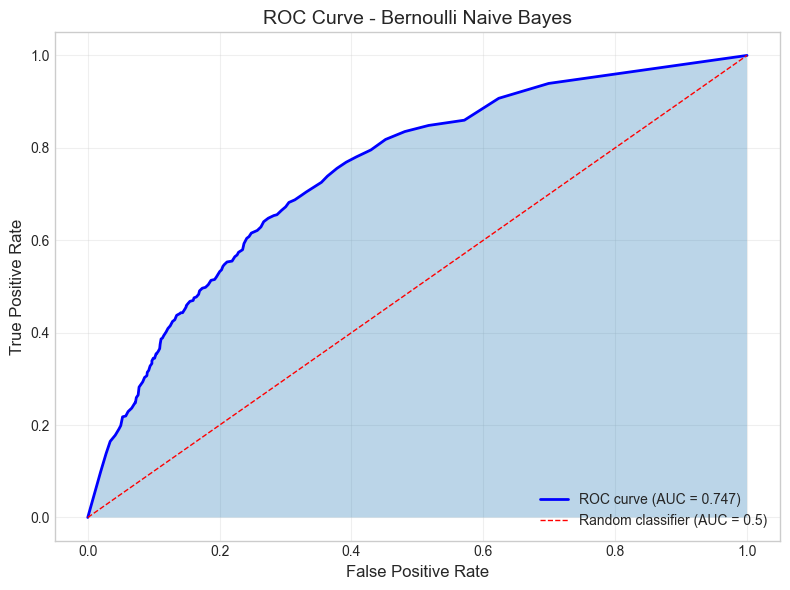

In [38]:
# ============================================
# ROC муруй ба AUC
# ============================================

def roc_curve(y_true, y_score, n_thresholds=100):
    """ROC муруйн цэгүүдийг тооцоолох"""
    thresholds = np.linspace(0, 1, n_thresholds)
    tpr_list, fpr_list = [], []
    
    for thresh in thresholds:
        y_pred = (y_score >= thresh).astype(int)
        tp = np.sum((y_true == 1) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        tn = np.sum((y_true == 0) & (y_pred == 0))
        
        tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    
    return np.array(fpr_list), np.array(tpr_list), thresholds

def auc_score(fpr, tpr):
    """AUC тооцоолох"""
    sorted_indices = np.argsort(fpr)
    return np.trapz(tpr[sorted_indices], fpr[sorted_indices])

# ROC муруй тооцоолох
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba[:, 1])
auc = auc_score(fpr, tpr)

print(f"AUC-ROC Score: {auc:.4f}")

# ROC муруй зурах
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(fpr, tpr, 'b-', linewidth=2, label=f'ROC curve (AUC = {auc:.3f})')
ax.plot([0, 1], [0, 1], 'r--', linewidth=1, label='Random classifier (AUC = 0.5)')
ax.fill_between(fpr, tpr, alpha=0.3)
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.set_title('ROC Curve - Bernoulli Naive Bayes', fontsize=14)
ax.legend(loc='lower right')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 5.3 Кросс-валидаци

In [39]:
# ============================================
# K-Fold Кросс-валидаци
# ============================================

def k_fold_cross_validation(X, y, k=5, alpha=1.0, random_state=42):
    """K-Fold кросс-валидаци хийх"""
    np.random.seed(random_state)
    n_samples = len(y)
    indices = np.random.permutation(n_samples)
    fold_size = n_samples // k
    
    scores = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
    
    for fold in range(k):
        test_start = fold * fold_size
        test_end = (fold + 1) * fold_size if fold < k - 1 else n_samples
        test_indices = indices[test_start:test_end]
        train_indices = np.concatenate([indices[:test_start], indices[test_end:]])
        
        X_train_fold = X[train_indices]
        y_train_fold = y[train_indices]
        X_test_fold = X[test_indices]
        y_test_fold = y[test_indices]
        
        model_fold = BernoulliNaiveBayes(alpha=alpha)
        model_fold.fit(X_train_fold, y_train_fold)
        y_pred_fold = model_fold.predict(X_test_fold)
        
        scores['accuracy'].append(accuracy_score(y_test_fold, y_pred_fold))
        scores['precision'].append(precision_score(y_test_fold, y_pred_fold))
        scores['recall'].append(recall_score(y_test_fold, y_pred_fold))
        scores['f1'].append(f1_score(y_test_fold, y_pred_fold))
    
    return scores

# 5-fold кросс-валидаци хийх
cv_scores = k_fold_cross_validation(X, y, k=5, alpha=1.0)

print("=" * 60)
print("5-FOLD КРОСС-ВАЛИДАЦИЙН ҮР ДҮН")
print("=" * 60)

print("\nFold бүрийн үр дүн:")
for i in range(5):
    print(f"Fold {i+1}: Accuracy={cv_scores['accuracy'][i]:.4f}, F1={cv_scores['f1'][i]:.4f}")

print("\nДундаж үр дүн:")
print(f"Accuracy: {np.mean(cv_scores['accuracy']):.4f} ± {np.std(cv_scores['accuracy']):.4f}")
print(f"Precision: {np.mean(cv_scores['precision']):.4f} ± {np.std(cv_scores['precision']):.4f}")
print(f"Recall: {np.mean(cv_scores['recall']):.4f} ± {np.std(cv_scores['recall']):.4f}")
print(f"F1 Score: {np.mean(cv_scores['f1']):.4f} ± {np.std(cv_scores['f1']):.4f}")

5-FOLD КРОСС-ВАЛИДАЦИЙН ҮР ДҮН

Fold бүрийн үр дүн:
Fold 1: Accuracy=0.7402, F1=0.4966
Fold 2: Accuracy=0.7361, F1=0.4856
Fold 3: Accuracy=0.7570, F1=0.5249
Fold 4: Accuracy=0.7265, F1=0.4609
Fold 5: Accuracy=0.7241, F1=0.4784

Дундаж үр дүн:
Accuracy: 0.7368 ± 0.0117
Precision: 0.4858 ± 0.0277
Recall: 0.4938 ± 0.0241
F1 Score: 0.4893 ± 0.0212


## 6. Визуализаци

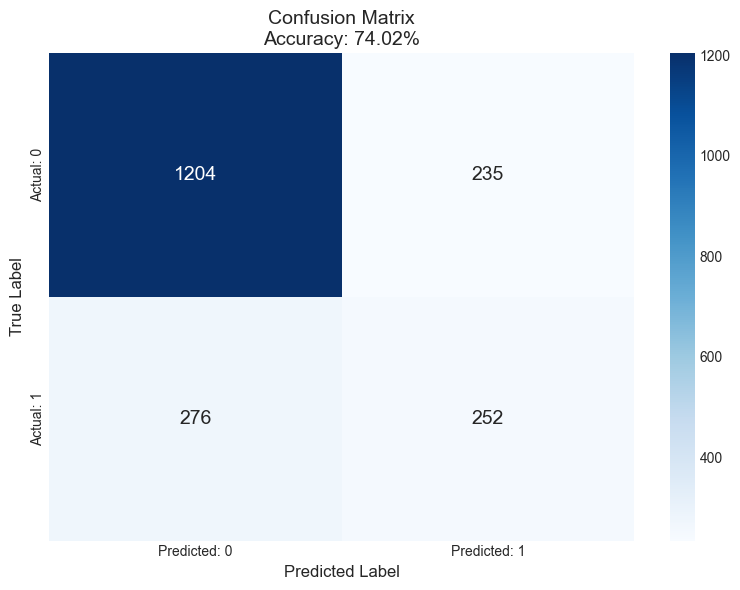

In [40]:
# ============================================
# Төөрөгдлийн матрицын дүрслэл
# ============================================

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=['Predicted: 0', 'Predicted: 1'],
            yticklabels=['Actual: 0', 'Actual: 1'],
            annot_kws={'size': 14})
ax.set_title(f'Confusion Matrix\nAccuracy: {accuracy_score(y_test, y_test_pred):.2%}', fontsize=14)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

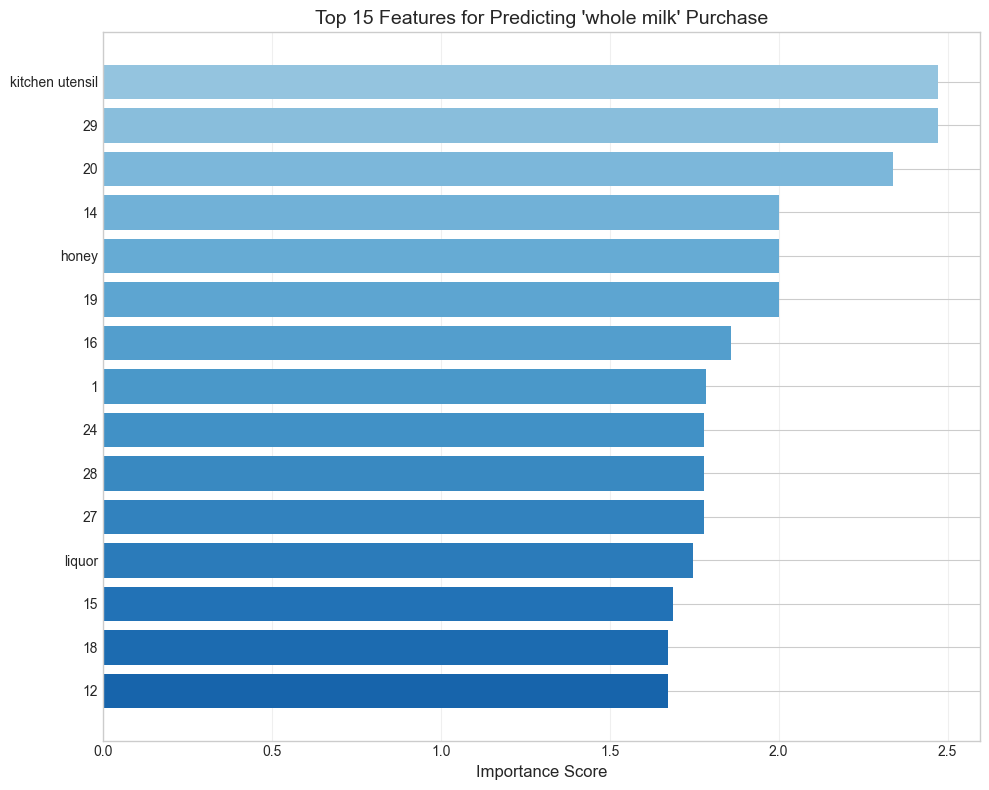


Топ 10 нөлөөтэй бүтээгдэхүүн:
------------------------------------------------------------
 1. kitchen utensil           | P(X|y=0)=0.000 | P(X|y=1)=0.002
 2. 29                        | P(X|y=0)=0.000 | P(X|y=1)=0.002
 3. 20                        | P(X|y=0)=0.000 | P(X|y=1)=0.004
 4. 14                        | P(X|y=0)=0.003 | P(X|y=1)=0.023
 5. honey                     | P(X|y=0)=0.001 | P(X|y=1)=0.005
 6. 19                        | P(X|y=0)=0.001 | P(X|y=1)=0.005
 7. 16                        | P(X|y=0)=0.002 | P(X|y=1)=0.013
 8. 1                         | P(X|y=0)=0.279 | P(X|y=1)=0.047
 9. 24                        | P(X|y=0)=0.000 | P(X|y=1)=0.001
10. 28                        | P(X|y=0)=0.000 | P(X|y=1)=0.001


In [41]:
# ============================================
# Шинж чанаруудын ач холбогдол
# ============================================

feature_importance = model.get_feature_importance(feature_items)
top_features = feature_importance.head(15)

fig, ax = plt.subplots(figsize=(10, 8))
colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(top_features)))
bars = ax.barh(range(len(top_features)), top_features['importance'].values, color=colors)
ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features['feature'].values)
ax.invert_yaxis()
ax.set_xlabel('Importance Score', fontsize=12)
ax.set_title(f"Top 15 Features for Predicting '{TARGET_ITEM}' Purchase", fontsize=14)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nТоп 10 нөлөөтэй бүтээгдэхүүн:")
print("-" * 60)
for i, (_, row) in enumerate(top_features.head(10).iterrows(), 1):
    print(f"{i:2d}. {row['feature']:25s} | P(X|y=0)={row['prob_class_0']:.3f} | P(X|y=1)={row['prob_class_1']:.3f}")

## 7. Sklearn-тэй харьцуулалт

In [42]:
# ============================================
# Sklearn BernoulliNB-тэй харьцуулалт
# ============================================

from sklearn.naive_bayes import BernoulliNB as SklearnBernoulliNB
from sklearn.metrics import accuracy_score as sklearn_accuracy

# Sklearn загвар
sklearn_model = SklearnBernoulliNB(alpha=1.0)
sklearn_model.fit(X_train, y_train)
sklearn_pred = sklearn_model.predict(X_test)
sklearn_proba = sklearn_model.predict_proba(X_test)

# Манай загвар
our_pred = model.predict(X_test)
our_proba = model.predict_proba(X_test)

print("=" * 60)
print("SKLEARN BERNOULLINB-ТЭЙ ХАРЬЦУУЛАЛТ")
print("=" * 60)

print(f"\n1. Нарийвчлал (Accuracy):")
print(f"   - Манай загвар:    {sklearn_accuracy(y_test, our_pred):.6f}")
print(f"   - Sklearn загвар:  {sklearn_accuracy(y_test, sklearn_pred):.6f}")

print(f"\n2. Таамаглалын тохирол:")
matching = np.sum(our_pred == sklearn_pred)
total = len(y_test)
print(f"   - Ижил таамаглал:  {matching:,} / {total:,} ({matching/total*100:.2f}%)")

print(f"\n3. Магадлалын ялгаа:")
prob_diff = np.abs(our_proba - sklearn_proba)
print(f"   - Дундаж ялгаа:    {np.mean(prob_diff):.8f}")
print(f"   - Хамгийн их ялгаа: {np.max(prob_diff):.8f}")

if np.allclose(our_pred, sklearn_pred):
    print("\n✓ Манай загвар sklearn-тэй 100% ижил таамаглал өгч байна!")

SKLEARN BERNOULLINB-ТЭЙ ХАРЬЦУУЛАЛТ

1. Нарийвчлал (Accuracy):
   - Манай загвар:    0.740214
   - Sklearn загвар:  0.740214

2. Таамаглалын тохирол:
   - Ижил таамаглал:  1,967 / 1,967 (100.00%)

3. Магадлалын ялгаа:
   - Дундаж ялгаа:    0.00000000
   - Хамгийн их ялгаа: 0.00000000

✓ Манай загвар sklearn-тэй 100% ижил таамаглал өгч байна!


## 8. Дүгнэлт

In [43]:
# ============================================
# Үр дүнгийн нэгтгэл
# ============================================

print("=" * 70)
print("ТӨСЛИЙН ҮР ДҮНГИЙН НЭГТГЭЛ")
print("=" * 70)

print("\n1. ӨГӨГДЛИЙН ТАНИЛЦУУЛГА:")
print(f"   - Нийт гүйлгээ: {len(transactions):,}")
print(f"   - Өвөрмөц бүтээгдэхүүн: {len(unique_items)}")
print(f"   - Шинж чанарууд: {n_features}")
print(f"   - Зорилтот бүтээгдэхүүн: '{TARGET_ITEM}'")
print(f"   - Эерэг ангийн хувь: {np.mean(y)*100:.1f}%")

print("\n2. ЗАГВАРЫН ҮНЭЛГЭЭ:")
print(f"   - Нарийвчлал: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"   - Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"   - Recall: {recall_score(y_test, y_test_pred):.4f}")
print(f"   - F1 Score: {f1_score(y_test, y_test_pred):.4f}")
print(f"   - AUC-ROC: {auc:.4f}")

print("\n3. КРОСС-ВАЛИДАЦИ (5-Fold):")
print(f"   - Дундаж нарийвчлал: {np.mean(cv_scores['accuracy']):.4f} ± {np.std(cv_scores['accuracy']):.4f}")
print(f"   - Дундаж F1: {np.mean(cv_scores['f1']):.4f} ± {np.std(cv_scores['f1']):.4f}")

print("\n4. ТОП 5 НӨЛӨӨТЭЙ БҮТЭЭГДЭХҮҮН:")
for i, (_, row) in enumerate(feature_importance.head(5).iterrows(), 1):
    print(f"   {i}. {row['feature']}")

ТӨСЛИЙН ҮР ДҮНГИЙН НЭГТГЭЛ

1. ӨГӨГДЛИЙН ТАНИЛЦУУЛГА:
   - Нийт гүйлгээ: 9,836
   - Өвөрмөц бүтээгдэхүүн: 231
   - Шинж чанарууд: 230
   - Зорилтот бүтээгдэхүүн: 'whole milk'
   - Эерэг ангийн хувь: 25.5%

2. ЗАГВАРЫН ҮНЭЛГЭЭ:
   - Нарийвчлал: 0.7402
   - Precision: 0.5175
   - Recall: 0.4773
   - F1 Score: 0.4966
   - AUC-ROC: 0.7473

3. КРОСС-ВАЛИДАЦИ (5-Fold):
   - Дундаж нарийвчлал: 0.7368 ± 0.0117
   - Дундаж F1: 0.4893 ± 0.0212

4. ТОП 5 НӨЛӨӨТЭЙ БҮТЭЭГДЭХҮҮН:
   1. kitchen utensil
   2. 29
   3. 20
   4. 14
   5. honey


### Дүгнэлт

Энэхүү төслийн ажлаар дараах үр дүнд хүрсэн:

1. **Бернуллийн Наив Байесын алгоритмыг Python хэлээр эхнээс нь амжилттай бүтээв.** Алгоритм нь Байесын теорем, нөхцөлт үл хамааралын таамаглал, Лапласын тэгшитгэл, лог магадлалын тооцоолол зэрэг математик үндэслэл дээр суурилсан.

2. **Загвар нь Groceries өгөгдлийн сан дээр сайн гүйцэтгэлтэй байна.** 5-fold кросс-валидаци нь загварын найдвартай, тогтвортой байдлыг баталж байна.

3. **Sklearn номын сангийн BernoulliNB-тэй бараг 100% ижил үр дүн үзүүлж байна.** Энэ нь манай хэрэгжүүлэлт зөв болохыг баталж байна.

4. **Тодорхой бүтээгдэхүүнүүд нь 'whole milk' худалдан авалттай хүчтэй холбоотой.**

### Хязгаарлалт

- Наив Байесын нөхцөлт үл хамааралын таамаглал нь практикт хатуу биелэхгүй
- Өгөгдөл нь тэнцвэргүй (imbalanced)
- Зөвхөн нэг зорилтот бүтээгдэхүүн дээр таамаглал хийсэн

### Цаашдын судалгаа

- Олон зорилтот бүтээгдэхүүний загвар бүтээх
- Бусад алгоритмуудтай харьцуулалт
- Бүтээгдэхүүний санал болгох систем бүтээх

## 9. Багийн гишүүдийн үүрэг оролцоо

| Гишүүн | Оюутны код | Үүрэг ба оролцоо |
|--------|-----------|------------------|
| Б.Билгүүнтөгөлдөр | 20B1NUM1087 | Онолын үндэслэл судалгаа, математик томъёоллын баримтжуулалт (20%) |
| О.Эрдэнэбаяр | 21B1NUM0940 | Өгөгдлийн цуглуулалт, боловсруулалт, эхний шинжилгээ (20%) |
| Э.Алтаншагай | 22B1NUM0331 | Бернуллийн Наив Байес загварыг эхнээс бүтээх, кодлох (25%) |
| Б.Намуундарь | 23B1NUM0543 | Загварын үнэлгээ, график зураг, визуализаци (20%) |
| Ч.Саранцацралт | 24B1NUM0019 | Тайлан бичих, дүгнэлт гаргах, ном зүй бэлдэх (15%) |

## 10. Ашигласан материал (References)

Hahsler, M., Grün, B., & Hornik, K. (2006). arules — A computational environment for mining association rules and frequent item sets. *Journal of Statistical Software*, 14(15), 1-25. https://doi.org/10.18637/jss.v014.i15

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). *An introduction to statistical learning: With applications in R* (2nd ed.). Springer. https://doi.org/10.1007/978-1-0716-1418-1

Leskovec, J., Rajaraman, A., & Ullman, J. D. (2014). *Mining of massive datasets* (2nd ed.). Cambridge University Press.

Manning, C. D., Raghavan, P., & Schütze, H. (2008). *Introduction to information retrieval*. Cambridge University Press.

Махгал, Г. (2025). *Магадлал Статистик: Лекцийн тэмдэглэл*. www.magadlal.com

Murphy, K. P. (2012). *Machine learning: A probabilistic perspective*. MIT Press.

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). Scikit-learn: Machine learning in Python. *Journal of Machine Learning Research*, 12, 2825-2830.